In [72]:
#importing needed libraries
import seaborn as sb
import matplotlib.pyplot as plt 
import pandas as pd


In [73]:
ds=pd.read_csv('D:\AMIT AI\house price.csv') #openening the fileds=

In [74]:
ds.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [75]:
ds.duplicated().sum()

0

In [76]:
ds.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [77]:
ds. rename(columns = {'X1 transaction date':'transaction_date','X4 number of convenience stores':'stores', 'X2 house age':'house_age','X3 distance to the nearest MRT station':'nearest_mrt','X5 latitude':'latitude','X6 longitude':'longitude','Y house price of unit area':'price'}, inplace = True)

In [78]:
ds.head()

,No,transaction_date,house_age,nearest_mrt,stores,latitude,longitude,price
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


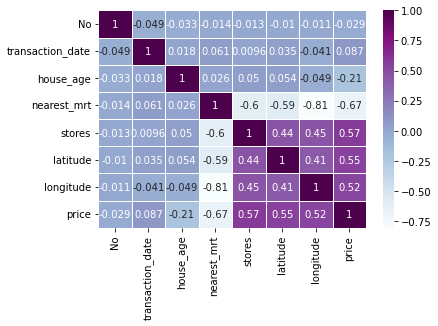

In [79]:
sb.heatmap( ds.corr(), linewidth = 1 ,cmap='BuPu', annot = True);

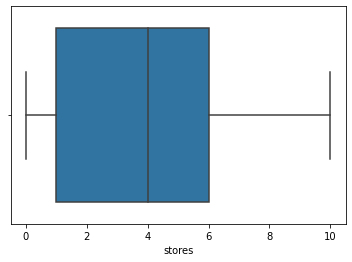

In [80]:
sb.boxplot(x=ds['stores']);

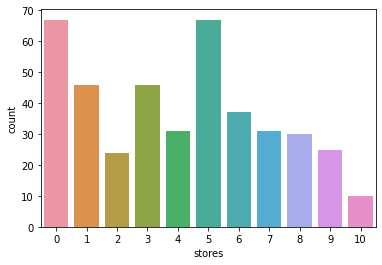

In [81]:
sb.countplot(x=ds['stores']);

In [82]:
ds['stores'].max()

10

In [83]:
ds['price'].max()

117.5

In [84]:
ds['house_age'].max()

43.8

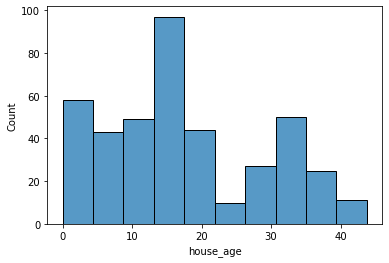

In [85]:
sb.histplot(x=ds['house_age']);

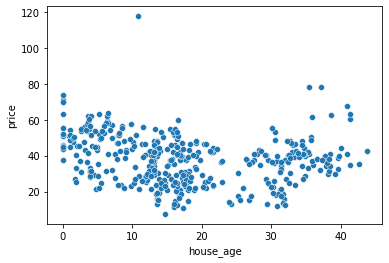

In [86]:
sb.scatterplot(x=ds['house_age'],y=ds['price']);

<AxesSubplot:xlabel='price'>

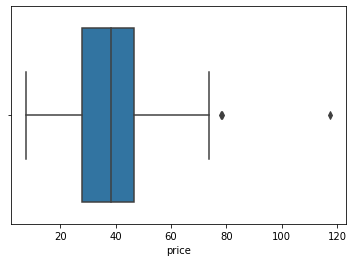

In [87]:
sb.boxplot(x=ds['price'])

In [88]:
ds.query("65<price<120")

,No,transaction_date,house_age,nearest_mrt,stores,latitude,longitude,price
16,17,2013.250,0.0,292.9978,6,24.97744,121.54458,70.1
105,106,2012.833,0.0,292.9978,6,24.97744,121.54458,71.0
166,167,2013.417,0.0,292.9978,6,24.97744,121.54458,73.6
220,221,2013.333,37.2,186.5101,9,24.97703,121.54265,78.3
270,271,2013.333,10.8,252.5822,1,24.97460,121.53046,117.5
312,313,2013.583,35.4,318.5292,9,24.97071,121.54069,78.0
379,380,2013.333,0.0,292.9978,6,24.97744,121.54458,69.7
389,390,2013.250,40.9,122.3619,8,24.96756,121.54230,67.7


In [89]:
ds=ds[ds['price']<100]

In [90]:
ds.query("65<price<120")

,No,transaction_date,house_age,nearest_mrt,stores,latitude,longitude,price
16,17,2013.250,0.0,292.9978,6,24.97744,121.54458,70.1
105,106,2012.833,0.0,292.9978,6,24.97744,121.54458,71.0
166,167,2013.417,0.0,292.9978,6,24.97744,121.54458,73.6
220,221,2013.333,37.2,186.5101,9,24.97703,121.54265,78.3
312,313,2013.583,35.4,318.5292,9,24.97071,121.54069,78.0
379,380,2013.333,0.0,292.9978,6,24.97744,121.54458,69.7
389,390,2013.250,40.9,122.3619,8,24.96756,121.54230,67.7


In [91]:
!pip install geopy

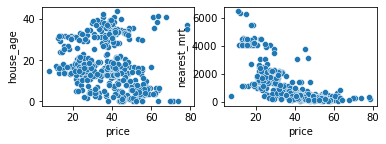

In [92]:
plt.subplot(2,2,1)
sb.scatterplot(y=ds['house_age'],x=ds['price']);
plt.subplot(2,2,2)
sb.scatterplot(y=ds['nearest_mrt'],x=ds['price']);


In [93]:
from geopy.geocoders import Nominatim

In [94]:
# list1=[]
# list2=[]
# for i in range (0,413):
    
#     geolocater=Nominatim(user_agent="geoapiExercises")
#     Latitude=str(ds['latitude'][i])
#     Longitude=str(ds['longitude'][i])
#     location=geolocater.reverse(Latitude+","+Longitude,language='en')
#     address=location.raw['address']
#     print('{}'.format(i))
#     list1.append(address['city'])

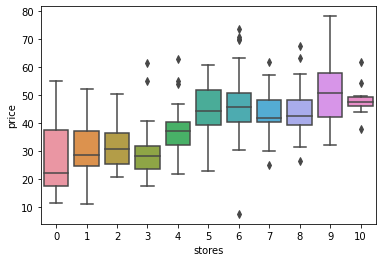

In [95]:
sb.boxplot(x=ds['stores'],y=ds['price']);

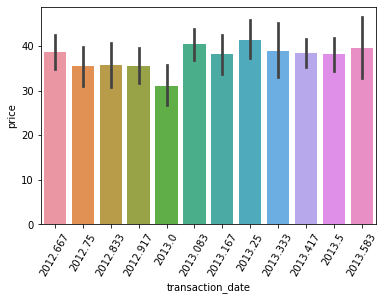

In [96]:
plt.xticks(rotation=60)
sb.barplot(x=ds['transaction_date'],y=ds['price']);

In [97]:
X=ds.drop(['price'],axis=1)
Y=ds['price']

In [98]:
split_ratio=0.8
x_train=X[0:round(414*split_ratio)]
x_test=X[round(414*split_ratio):]
y_train=Y[0:round(414*split_ratio)]
y_test=Y[round(414*split_ratio):]

In [107]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
linear_model=LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression()

In [108]:
print('Training accuracy',linear_model.score(x_train,y_train))


Training accuracy 0.6372719563203454


In [109]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
  
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(x_train)
  
poly.fit(X_poly, y_train)


PolynomialFeatures(degree=4)

In [110]:
model=Lasso(alpha=1)

In [111]:
model.fit(x_train,y_train)

Lasso(alpha=1)

In [112]:
print('Training accuracy',model.score(x_train,y_train))

Training accuracy 0.5923237569277333


In [113]:
model=Ridge(alpha=1)
model.fit(x_train,y_train)
print('Training accuracy',model.score(x_train,y_train))

Training accuracy 0.607369145458593
